#### sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [1]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('./datasets/boston_housing.csv' , header=None , delimiter=r"\s+" , names=column_names)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [2]:
y_target = boston_df['MEDV']
x_data = boston_df.drop(['MEDV'],axis=1,inplace=False)

In [5]:
import numpy as np 
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y_target = boston_df['MEDV']
x_data = boston_df.drop(['MEDV'],axis=1,inplace=False)
x_tr,x_test,y_tr,y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=1)

ridge= Ridge(alpha=10)
lr=LinearRegression()

neg_mse_score = cross_val_score(ridge, x_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_score=np.sqrt(-1*neg_mse_score)
avg_rmse=np.mean(rmse_score)

print(f'릿지 5폴드의 개별 mse:{np.round(neg_mse_score, 3)}')
print(f'릿지 5폴드의 개별 RMSE:{np.round(rmse_score,3)}')
print(f'릿지 5폴드 평균 RMSE:{avg_rmse}')

lr_mse_score = cross_val_score(lr, x_data,y_target,scoring='neg_mean_squared_error',cv=5)
lr_rmse=np.sqrt(-1*lr_mse_score)
lr_avg_rmse=np.mean(lr_rmse)

print(f'리니어 5폴드의 개별 mse:{np.round(lr_mse_score, 3)}')
print(f'리니어 5폴드의 개별 RMSE:{np.round(lr_rmse,3)}')
print(f'리니어 5폴드 평균 RMSE:{lr_avg_rmse}')


릿지 5폴드의 개별 mse:[-11.422 -24.294 -28.144 -74.599 -28.517]
릿지 5폴드의 개별 RMSE:[3.38  4.929 5.305 8.637 5.34 ]
릿지 5폴드 평균 RMSE:5.518166280868973
리니어 5폴드의 개별 mse:[-12.46  -26.049 -33.074 -80.762 -33.314]
리니어 5폴드의 개별 RMSE:[3.53  5.104 5.751 8.987 5.772]
리니어 5폴드 평균 RMSE:5.828658946215835


In [18]:
alphas=[0,0.1,1,10,100]

for alpha in alphas :
    ridge = Ridge(alpha=alpha)

    neg_mse_score = cross_val_score(ridge, x_data,y_target,scoring='neg_mean_squared_error',cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_score))
    print(f'알파가 {alpha}일때, 5폴드의 평균 RMSE:{avg_rmse}')

알파가 0일때, 5폴드의 평균 RMSE:5.828658946215807
알파가 0.1일때, 5폴드의 평균 RMSE:5.788486627032413
알파가 1일때, 5폴드의 평균 RMSE:5.652570965613547
알파가 10일때, 5폴드의 평균 RMSE:5.518166280868973
알파가 100일때, 5폴드의 평균 RMSE:5.329589628472148


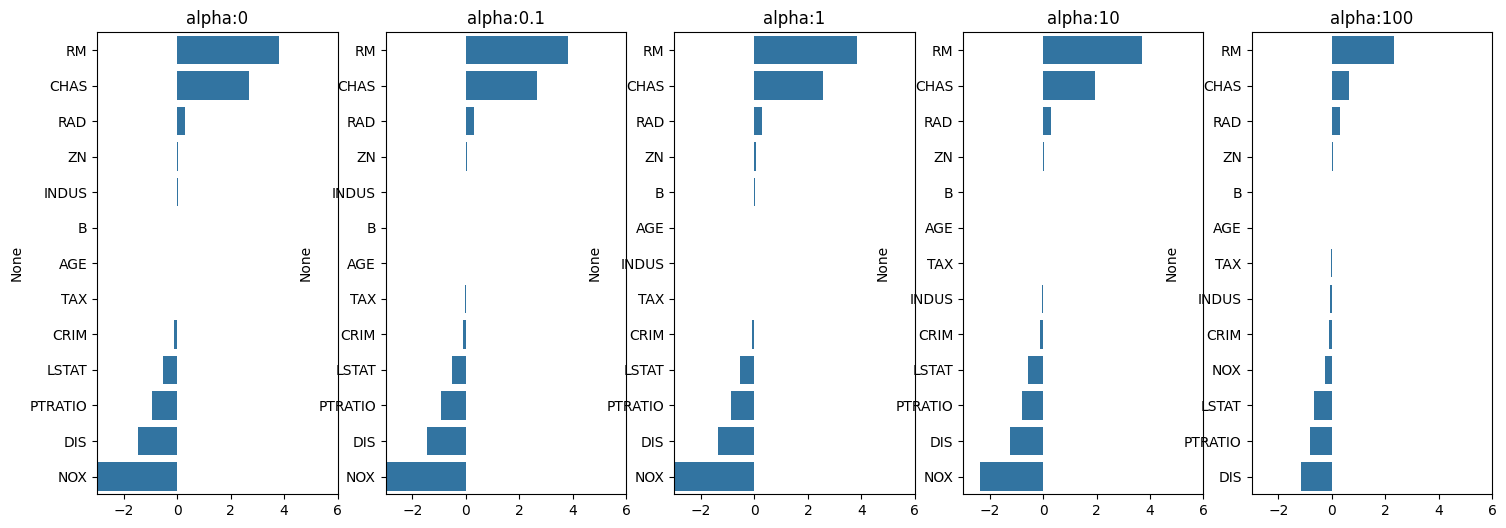

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index = x_data.columns)
    colname = f'alpha:{alpha}'
    coeff_df[colname]=coeff
    coeff= coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y= coeff.index, ax=axs[pos])

plt.show()

In [20]:
ridge_alphas=[0,0.1,1,10,100]

sort_column = f'alpha:{ridge_alphas[0]}'
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
